<a href="https://colab.research.google.com/github/zombe962/Pythoin-Math-For-AI-100/blob/master/11.%20%EA%B2%BD%EC%82%AC%EC%99%80%20%EB%AF%B8%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 11.2. 수치미분

def ndiff(f, x):
  h = 1e-5  # h가 0으로 한없이 가까워지는 것뿐, 0거나 지나치게 작으면 오류 발생!
  return (f(x+h)-f(x-h))/(2*h)

def funcx2(x):
  return x**2 + 2*x + 1

x=15
y = funcx2(x)
fp = ndiff(funcx2, x)
print(x, y, fp)

15 256 32.000000001630724


In [ ]:
# p.s. 일반적인 미분 정의
h = 1e-5
print(((funcx2(x+h)-funcx2(x))/h))

32.00001000323027


일반적인 미분보다 수치미분의 오차가 더 적다

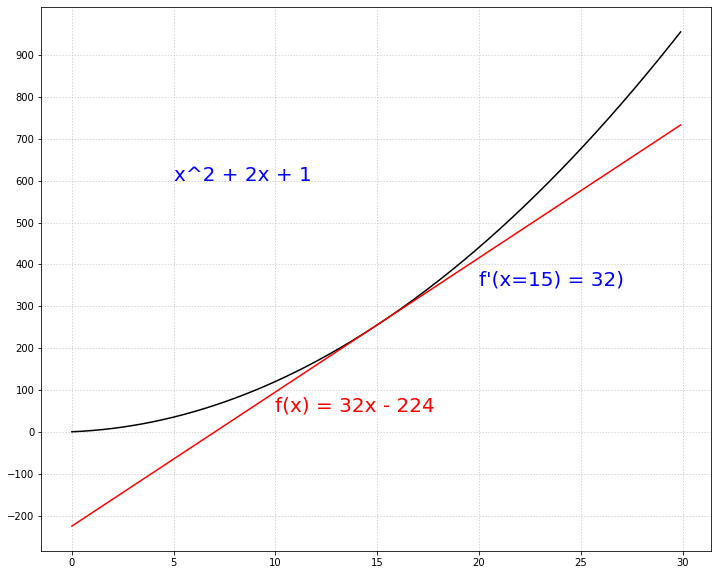

In [18]:
# 11.2. 수치미분 2

import numpy as np
import matplotlib.pyplot as plt

x0 = 15
y0 = funcx2(x0)
grad = ndiff(funcx2, x0)  # 미분 계수
# print(x0, y0, grad)
x = np.arange(0.00, 30.0, 0.1)
y = funcx2(x)
y1 = grad*(x-x0) + y0   # 접선의 방정식

plt.figure(figsize=(12,10))
plt.yticks(np.arange(-200, 1000, 100))
plt.xticks(np.arange(0, 301, 5))
plt.grid(dashes=(3, 3), linewidth=0.5)
plt.text(5, 600, 'x^2 + 2x + 1', color='blue', fontsize = 20)
plt.text(20, 350, 'f\'(x=15) = 32)', color='blue', fontsize = 20)
plt.text(10, 50, 'f(x) = 32x - 224', color='red', fontsize = 20)
plt.plot(x,y,'k-')  # k 는 black, -는 실선을 의미, --는 점선
plt.plot(x,y1,'r-') # r is red

plt.show()

In [19]:
# 11.6. 편미분 프로그래밍 코드

h = 1e-5

def function_rx(x, y):
  return x*2 + y**2

def ndiff2(f, x, y):
  rf_rx = (f(x+h, y)-f(x-h, y))/(2*h)
  rf_ry = (f(x, y+h)-f(x,y-h))/(2*h)
  return [rf_rx, rf_ry]

ndiff2(function_rx, 1, 3)

[1.9999999999242843, 6.000000000039306]

In [20]:
# 11.7. np.nditer

market = np.array([['apple', 'strawberry', 'grape'],
                   ['water', 'cola', 'orangerjuice']])

it = np.nditer(market, flags = ['multi_index'], op_flags = ['readwrite'])
while not it.finished:
  idx = it.multi_index
  print(market[idx])

  it.iternext()

apple
strawberry
grape
water
cola
orangerjuice


* it.finsihed --- 행렬의 끝이면 True를 아니면 False를 반환
* it.multi_index --- 행렬의 인덱스를 반환
* it.iternext() --- 현재의 인덱스에서 1 증가한 인덱스로 변환

it.iternext()는 인덱스를 1 증가시킨다. 우선 열의 인덱스를 증가시킨 후 더 이상 증가할 수 없을 때 행을 1 증가시킨다.

(0,0) -> (0,1) -> (0,2) -> (1,0) -> (1,1) -> (1,2)


# 11-8 신경망 계산 과정에서의 미분 이해

v = affine() ------ (1) w0, b0을 이용 [변수의 개수 39,200개]

h = relu(v) ------ (2) v를 h로 변환

y = affine() ------ (3) w1, b1을 이용 [변수의 개수 510개]
* y = [ 0일 확률, 1일 확률, 2일 확률, ... 9일 확률 ]

y = softmax(y) ------ (4) 확률값으로 변환

y = loss(y, t) ------ (5) 오차 계산
* 오차 계산시 손실함수로 CEE(Cross Entropy Error)를 사용. 이때 다른 손실 함수인 MSE(평균제곱오차)를 사용해도 무방하나 CEE가 MSE 보다 더욱 효율적.

## 변수들이 모두 39,760개이므로 무작위로 하나씩 고쳐 나가는 것보다는 미분을 통해 고쳐나감.

In [23]:
#11.10. nditer 편미분 코드 1

import numpy as np

def numerical_diff(f, x):
  h = 1e-4  #0.0001
  nd_coef = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    index = it.multi_index
    tmp = x[index]
    x[index] = tmp + h
    fxh2 = f()  #f(x+h)
    x[index] = tmp - h
    fxh1 = f()  #f(x-h)
    nd_coef[index] = (fxh2 - fxh1) / (2*h)
    x[index] = tmp
    it.iternext()
  
  return nd_coef

# 이 아래 내용은 numerical_diff() 함수가 잘 작동하는지 알아보기 위해 (2,3)짜리 간단한 w0을 만들고, CEE() 함수 대신 간단한 func()함수를 만들어서 test함.
w0 = np.array([[.1,.2,.3],
               [.2,.4,.6]])

def func():
  y = 2*w0[0,0]-3*w0[0,1]+4*w0[0,2]-5*w0[1,0]+6*w0[1,1]-7*w0[1,2]+8
  # 기울기는 앞에서부터 순서대로 2, -3, 4, -5, 6, -7
  return y

a = numerical_diff(func, w0)
print(a)

[[ 2. -3.  4.]
 [-5.  6. -7.]]


# 11-11 경사하강법

손실함수의 결괏값이 더 작게 나오기 하기 위해서 경사하강법을 사용함.
 
## 경사하강법의 수식
* x0 = x0 - η(∂f/∂x0)
* x1 = x1 - η(∂f/∂x1)

## 경사하강법의 알고리즘
1. x값에 대한 미분으로 기울기를 구한다.
2. x를 (학습률*기울기*x)만큼 작게 만든다.
3. 위의 과정을 반복(100회)한다.

x =  [-1.23071955e-04  8.20479703e-05]


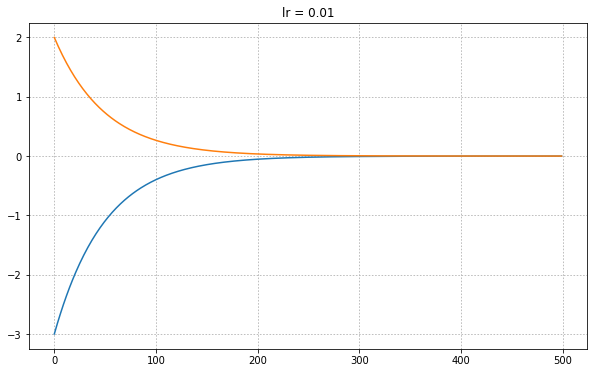

In [44]:
# 11.11. 경사하강법

import numpy as np
import matplotlib.pyplot as plt

def numerical_diff(f, x):
  h = 1e-4  #0.0001
  nd_coef = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    index = it.multi_index
    tmp = x[index]
    x[index]= tmp + h
    fxh2 = f()  #f(x+h)
    x[index] = tmp - h
    fxh1 = f()  #f(x-h)
    nd_coef[index] = (fxh2 - fxh1) / (2*h)
    x[index] = tmp
    it.iternext()

  return nd_coef

def func():   #손실함수
  return x[0]**2 + x[1]**2

#네트워크변수 x의 초깃값과 학습률 lr 입력
(x, lr, iter_num) = np.array([-3.0, 2.0]), 0.01, 500
Y1, Y2 = [], []

for i in range(iter_num): # 네트워크 변수에서 (기울기*학습률*네트워크변수)의 값을 빼줌.
  Y1.append(x[0])
  Y2.append(x[1])
  grad = numerical_diff(func, x)
  x -= lr * grad

# 네트워크변수 x의 학습 후 결괏값
print('x = ', x)

X = np.arange(0, len(Y1), 1)

plt.figure(figsize=(10,6))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.grid(dashes=(2,2))
plt.title('lr = 0.01')
plt.show()

x =  [-2.71448511  1.80965674]


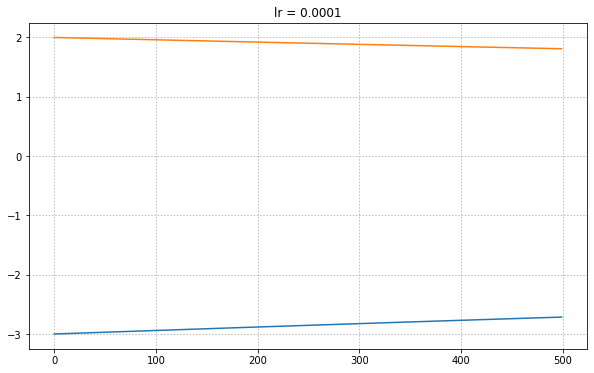

In [39]:
#네트워크변수 x의 초깃값과 학습률 lr 입력
(x, lr, iter_num) = np.array([-3.0, 2.0]), 0.0001, 500
Y1, Y2 = [], []

for i in range(iter_num):
  #print('step ={:4d}'.format(i), ', x=' x)
  Y1.append(x[0])
  Y2.append(x[1])
  grad = numerical_diff(func, x)
  x -= lr * grad

# 네트워크변수 x의 학습 후 결괏값
print('x = ', x)

X = np.arange(0, len(Y1), 1)

plt.figure(figsize=(10,6))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.grid(dashes=(2,2))
plt.title('lr = 0.0001')

plt.show()

학습률이 너무 작아 지나치게 많은 시간이 걸리거나 학습이 일어나지 않음

x =  [-8.14670555  5.43113704]


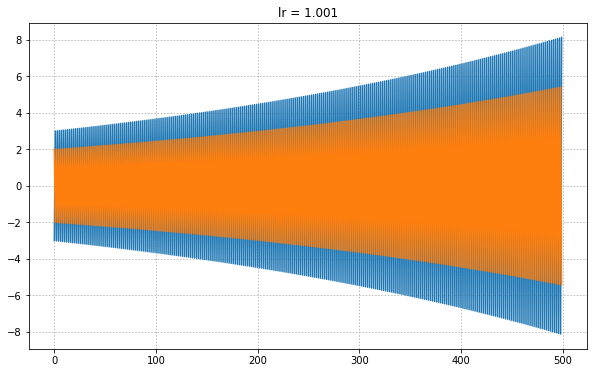

In [43]:
#네트워크변수 x의 초깃값과 학습률 lr 입력
(x, lr, iter_num) = np.array([-3.0, 2.0]), 1.001, 500
Y1, Y2 = [], []

for i in range(iter_num):
  #print('step ={:4d}'.format(i), ', x=' x)
  Y1.append(x[0])
  Y2.append(x[1])
  grad = numerical_diff(func, x)
  x -= lr * grad

# 네트워크변수 x의 학습 후 결괏값
print('x = ', x)

X = np.arange(0, len(Y1), 1)

plt.figure(figsize=(10,6))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.grid(dashes=(2,2))
plt.title('lr = 1.001')

plt.show()

학습률이 커서 발산